<a href="https://colab.research.google.com/github/PabloDome/Fisica2/blob/main/Fisica2_Labo1_CampoElectrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 - Graficar el campo en función de la posición (x,y)**

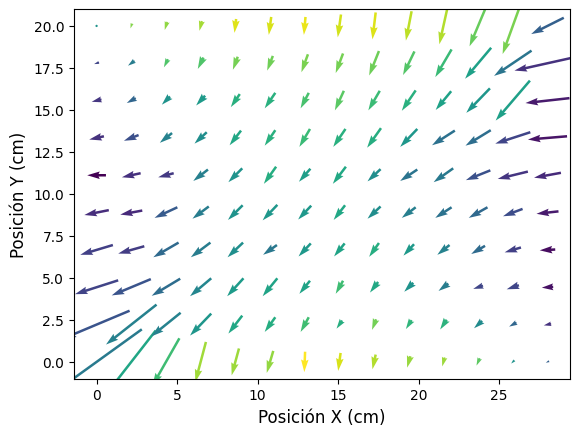

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Armo la grilla para graficar con Meshgrid

Tamx = 10
Tamy = 14

x, y = np.meshgrid(np.linspace(0, 28, 14),
                   np.linspace(0, 20, 10))

# Asigno los voltajes a cada uno de los puntos en la grilla, donde los archivos Ej-Volt-x, Ej-Volt-y son los archivos que tienen los datos
u = -np.loadtxt('Ej-Volt-y', dtype=float)/2
v = -np.loadtxt('Ej-Volt-x', dtype=float)/2

# Lo voy a usar después, pero calculo los errores de cada medida tomando dV = 0.01 V y dr = 0.1 cm

du = u*0
dv = v*0

for i in range(Tamx):
  for j in range(Tamy):
    du[i,j] = u[i,j]*0.01 + 0.1/1
    dv[i,j] = v[i,j]*0.01 + 0.1/1

# Grafico con quiver
plt.quiver(x, y, u, v, np.arctan(v/u), pivot='mid',color='g')

plt.ylabel('Posición Y (cm)', fontsize = 12)
plt.xlabel('Posición X (cm)', fontsize = 12)

plt.show()

**Modelo de las diferencias de potencial para: $$\frac{q}{2 \pi \epsilon _0} = 1$$**

<ipython-input-32-0acd894afb6e>:8: RuntimeWarning: invalid value encountered in double_scalars
  dVx = -Rx/pow(r,3)
<ipython-input-32-0acd894afb6e>:9: RuntimeWarning: invalid value encountered in double_scalars
  dVy = -Ry/pow(r,3)


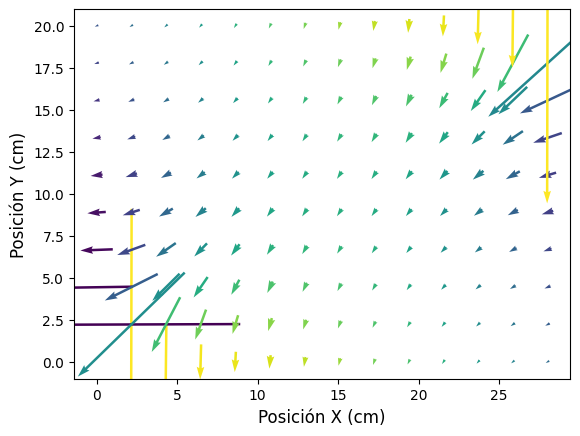

In [ ]:
# Modelo del potencial
def ModeloCampo(Px,Py,Qx,Qy):

    Rx = Qx-Px
    Ry = Qy-Py
    r = np.sqrt(Rx*Rx + Ry*Ry)

    dVx = -Rx/pow(r,3)
    dVy = -Ry/pow(r,3)

    return dVx, dVy


Q1 = (30,20)
Q2 = (0,0)

# Meshgrid
x, y = np.meshgrid(np.linspace(0, 28, 14),
                   np.linspace(0, 20, 10))

u1 = x*0
u2 = x*0
v1 = x*0
v2 = x*0

for i in range(10):
    for j in range(14):
        v1[i,j], u1[i,j] = ModeloCampo(x[i,j],y[i,j], Q1[0], Q1[1])
        v2[i,j], u2[i,j] = ModeloCampo(x[i,j],y[i,j], Q2[0], Q2[1])

u_mod = u1 - u2
v_mod = v1 - v2

plt.quiver(x, y, u_mod, v_mod, np.arctan(v_mod/u_mod), pivot='mid',color='g')

plt.ylabel('Posición Y (cm)', fontsize = 12)
plt.xlabel('Posición X (cm)', fontsize = 12)

plt.show()

Después elijo una curva para comprar los valores obtenidos entre el modelo y las medidas, para eso tomo la diagonal, con i=j, y busco el mejor valor de $C = q/ 2 \pi \epsilon$

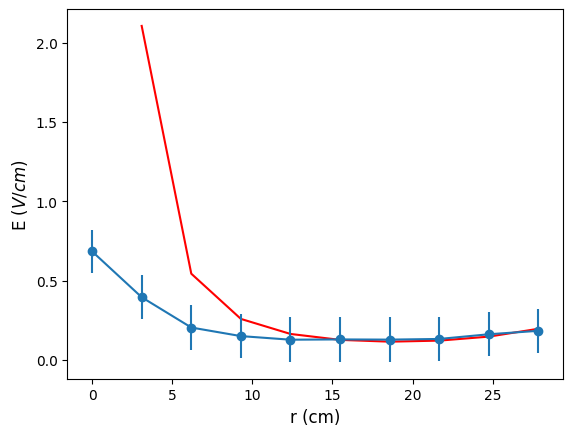

In [ ]:
E = []
DeltaE = []
DeltaR = [] # Cómo grafico en función de la posición, r tiene su respectivo error
E_mod = []
r = []
C = 20.0 # Por ser la primera vez, solo voy a poner

for i in range(10):
    for j in range(14):
        if i == j :
            E.append(np.sqrt(u[i,j]*u[i,j] + v[i,j]*v[i,j]))
            E_mod.append(C*np.sqrt(u_mod[i,j]*u_mod[i,j] + v_mod[i,j]*v_mod[i,j]))
            r.append(np.sqrt(x[i,j]*x[i,j] + y[i,j]*y[i,j]))
            DeltaE.append(np.sqrt(du[i,j]*du[i,j] + dv[i,j]*dv[i,j]))
            DeltaR.append(np.sqrt(0.1*0.1 + 0.1*0.1))

plt.plot(r, E_mod, '-', color = 'r')
plt.errorbar(r, E, DeltaE, DeltaR, '-o')

plt.ylabel('E ($V / cm$)', fontsize = 12)
plt.xlabel('r (cm)', fontsize = 12)
plt.show()

# Análisis de las resistencias

Ahora analizo un poco de la estadistica de la distribución de resistencias que medí en el papel, correspondiente a la resistencia en 1 cm, para poder visualizar una misma medida tomada en distintos puntos se va a usar un histograma.

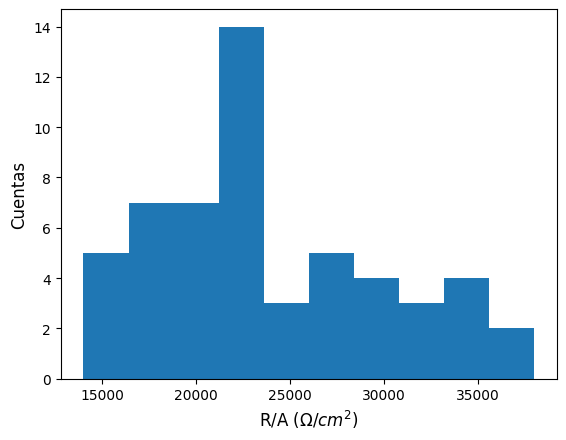

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

Res = np.loadtxt('Resistencia', dtype=float)

x_axis = np.arange(np.min(Res*1000), np.max(Res*1000), 100)

plt.ylabel('Cuentas', fontsize = 12)
plt.xlabel('R/A ($\Omega /cm ^2$)', fontsize = 12)

plt.hist(Res*1000)

plt.show()


Para empezar usemos una distribución Normal, o Gaussiana:

$p(x) = p_0 \cdot \mathrm{exp} \left ( \frac{(x - \mu )^2}{2 \sigma ^2}  \right)$

donde $p _0$ es una amplitud, $\mu$ es el valor medio, y $\sigma$ la dispersión.

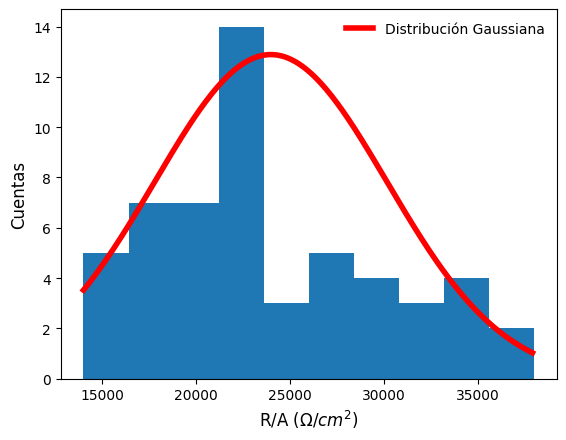

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

Res = np.loadtxt('Resistencia', dtype=float)

mean_norm, sd_norm = norm.fit(Res*1000)

np.histogram(Res*1000)

x_axis = np.arange(np.min(Res*1000), np.max(Res*1000), 100)

plt.ylabel('Cuentas', fontsize = 12)
plt.xlabel('R/A ($\Omega /cm ^2$)', fontsize = 12)

plt.hist(Res*1000)
plt.plot(x_axis,200000*norm.pdf(x_axis, mean_norm, sd_norm), color = 'r', linewidth = '4', label = 'Distribución Gaussiana')
plt.legend(loc='upper right', framealpha=0.0, fontsize = 10)

plt.show()

Repito el mismo proceso, pero usando una distribución Lorentzsiana, también conocida como distribución de Cauchy-Lorentz

$p(x) = p_0 \cdot \frac{1}{\pi \sigma \left [ 1 + \left ( \frac{x - \mu }{\sigma} \right ) ^2 \right ]}$

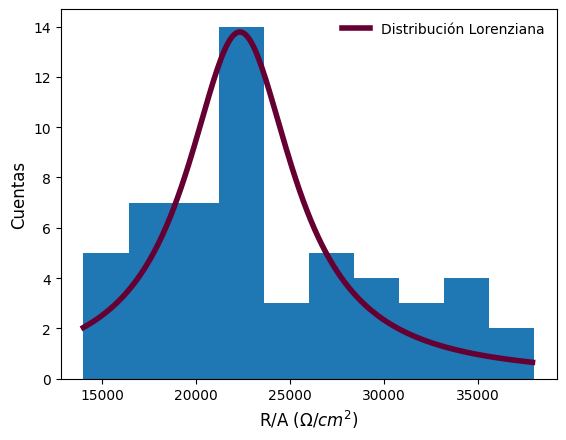

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy
import statistics

Res = np.loadtxt('Resistencia', dtype=float)

mean_chauchy, sd_chauchy = cauchy.fit(Res*1000)

np.histogram(Res*1000)

x_axis = np.arange(np.min(Res*1000), np.max(Res*1000), 100)

plt.ylabel('Cuentas', fontsize = 12)
plt.xlabel('R/A ($\Omega /cm ^2$)', fontsize = 12)

plt.hist(Res*1000)
plt.plot(x_axis,150000*cauchy.pdf(x_axis, mean_chauchy, sd_chauchy), color = '#660033', linewidth = '4', label = 'Distribución Lorenziana')
plt.legend(loc='upper right', framealpha=0.0, fontsize = 10)

plt.show()


Para comparar ponemos las dos

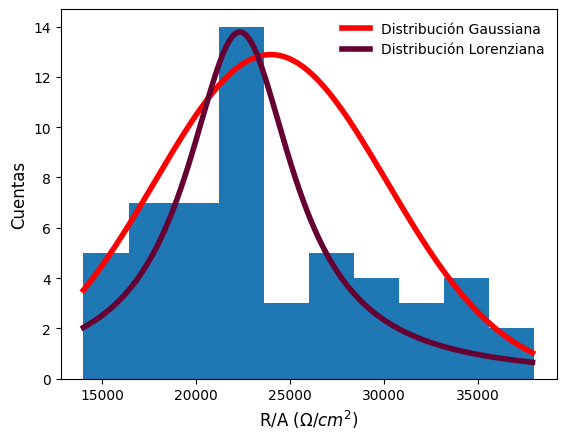

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import cauchy
import statistics

Res = np.loadtxt('Resistencia', dtype=float)

mean_norm, sd_norm = norm.fit(Res*1000)
mean_chauchy, sd_chauchy = cauchy.fit(Res*1000)

np.histogram(Res*1000)

x_axis = np.arange(np.min(Res*1000), np.max(Res*1000), 100)

plt.ylabel('Cuentas', fontsize = 12)
plt.xlabel('R/A ($\Omega /cm ^2$)', fontsize = 12)

plt.hist(Res*1000)
plt.plot(x_axis,200000*norm.pdf(x_axis, mean_norm, sd_norm), color = 'r', linewidth = '4', label = 'Distribución Gaussiana')
plt.plot(x_axis,150000*cauchy.pdf(x_axis, mean_chauchy, sd_chauchy), color = '#660033', linewidth = '4', label = 'Distribución Lorenziana')
plt.legend(loc='upper right', framealpha=0.0, fontsize = 10)

plt.show()